### 코로나 데이터 분석

### 학습 목표
 * 코로나 데이터와 백신 접종률 데이터를 수집하여 지금까지 내용을 나라별로 분석해 본다.
 * 데이터 분석을 통해 pandas에 대해 좀 더 깊이 알아본다.

### 데이터가 수집된 사이트 
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* 코로나 19(COVID-19) 실시간 상황판
  * https://coronaboard.kr/

In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 파일 불러오기

In [2]:
os.listdir(os.getcwd())

['.git',
 '.idea',
 '.ipynb_checkpoints',
 '01_dataScraping_corona01_today.ipynb',
 '01_dataScraping_corona02.py',
 '01_dataScraping_corona02_all.ipynb',
 '02_dataScraping_bloomberg.ipynb',
 '02_dataScraping_bloomberg.py',
 '03_corona_vaccine_merge.ipynb',
 '03_corona_vaccine_merge.py',
 '04_analysis_corr.ipynb',
 '05_people_request.ipynb',
 '06_corona_analysis.ipynb',
 '20210921_00_datamerge.csv',
 '20210921_00_datamerge.xlsx',
 '20210929_chrome_driver_01.ipynb',
 '2021_0911_13',
 '2021_0911_13.zip',
 '2021_0920_00',
 'chromedriver_91.exe',
 'data',
 'html_pdf',
 'project01_01',
 'README.md',
 'WEB_sel_project11_naverNews_corona_0731.ipynb']

In [12]:
import pandas as pd

corona = pd.read_csv("./data/20210930_00_datamerge.csv")
corona.shape

(178, 24)

### Learn 01. 보이지 않는 전체 내용을 표시해 보기

In [13]:
print( pd.options.display.max_rows )    
print( pd.options.display.max_columns )

500
500


In [14]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500 

In [15]:
corona.head()

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,64.4,55.8,13.0,52.5,0.133098,701422.0,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,(-523),44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1
1,인도,India,46.7,16.8,103.0,119.0,0.024434,7178901.0,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,NaN,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0
2,브라질,Brazil,71.3,41.9,29.0,70.5,0.100592,1317163.0,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,NaN,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5
3,영국,U.K.,73.0,67.1,20.0,24.0,0.113959,63126.0,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,(-47),7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0
4,러시아,Russia,32.6,28.5,77.0,89.0,0.051305,214966.0,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,NaN,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6


In [16]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글(국가명)    178 non-null    object 
 1   영문(블룸버그)   178 non-null    object 
 2   1차접종       178 non-null    float64
 3   2차접종       178 non-null    float64
 4   발생률순위      178 non-null    float64
 5   2차접종률순위    178 non-null    float64
 6   확진자비율(인구)  178 non-null    float64
 7   일별접종수      178 non-null    float64
 8   치명(%)      178 non-null    object 
 9   완치(%)      175 non-null    float64
 10  발생률        178 non-null    int64  
 11  인구수        178 non-null    int64  
 12  치료중합계      175 non-null    float64
 13  치료중1일      145 non-null    float64
 14  위중증합계      131 non-null    float64
 15  위중증1일      54 non-null     object 
 16  확진자합계      178 non-null    int64  
 17  확진자1일      146 non-null    float64
 18  사망자합계      178 non-null    int64  
 19  사망자1일      114 non-null    float64
 20  완치합계      

### 가설 : 백신 접종은 코로나 감염에 효과가 있다.

### 접종률(인구)와 발생률의 관계

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform

### 한글 표시하기

In [18]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [19]:
corona.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)',
       '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계',
       '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)'],
      dtype='object')

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

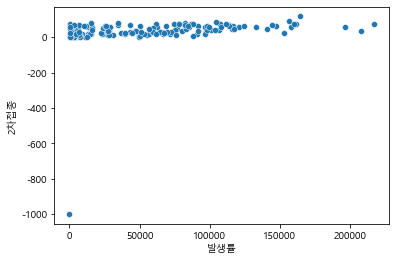

In [20]:
sns.scatterplot(x='발생률', y='2차접종', data=corona)

### 이상치 제거

In [21]:
corona = corona[corona['2차접종'] > 0]

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

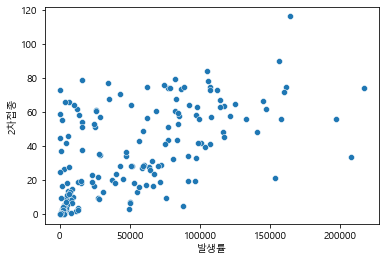

In [22]:
sns.scatterplot(x='발생률', y='2차접종', data=corona)

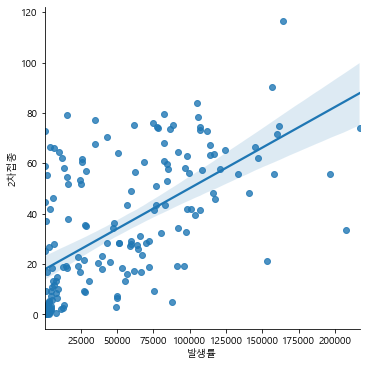

In [23]:
sns.lmplot(x='발생률', y='2차접종', data=corona)

In [24]:
corona[['발생률', '2차접종']].corr()

,발생률,2차접종
발생률,1.000000,0.597028
2차접종,0.597028,1.000000


### 확인 결과 나라별 백신 접종률과 인구당 확진자 비율은 0.582의 양의 상관관계를 갖는다.
 * 백신을 접종하면 할수록 인구당 확진자 비율은 양의 관계로 늘어난다.

### 백신 발생률과 사망률(인구당)은 어떠한가?

In [25]:
corona.head()

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,64.4,55.8,13.0,52.5,0.133098,701422.0,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,(-523),44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1
1,인도,India,46.7,16.8,103.0,119.0,0.024434,7178901.0,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,NaN,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0
2,브라질,Brazil,71.3,41.9,29.0,70.5,0.100592,1317163.0,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,NaN,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5
3,영국,U.K.,73.0,67.1,20.0,24.0,0.113959,63126.0,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,(-47),7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0
4,러시아,Russia,32.6,28.5,77.0,89.0,0.051305,214966.0,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,NaN,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6


In [26]:
### 사망률 = 사망자수/인구수
corona['사망률'] = corona['사망자합계'] /  corona['인구수']
corona.head(15)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률
0,미국,U.S.,64.4,55.8,13.0,52.5,0.133098,701422.0,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,(-523),44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1,0.002149
1,인도,India,46.7,16.8,103.0,119.0,0.024434,7178901.0,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,NaN,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0,0.000325
2,브라질,Brazil,71.3,41.9,29.0,70.5,0.100592,1317163.0,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,NaN,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5,0.002802
3,영국,U.K.,73.0,67.1,20.0,24.0,0.113959,63126.0,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,(-47),7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0,0.002009
4,러시아,Russia,32.6,28.5,77.0,89.0,0.051305,214966.0,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,NaN,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6,0.001414
5,터키,Turkey,64.5,53.0,44.0,57.0,0.084132,381129.0,0.9,92.4,84132,84339067,479198.0,-1683.0,633.0,NaN,7095580,28892.0,63611,239.0,6552771.0,30336.0,108761680.0,65.4,0.000754
6,프랑스,France,77.4,74.6,23.0,12.0,0.107278,229555.0,1.7,96.4,107278,65273511,135537.0,-6063.0,1609.0,NaN,7002393,6765.0,116615,78.0,6750241.0,12750.0,94250530.0,72.7,0.001787
7,이란,Iran,35.5,16.8,62.0,119.0,0.066350,1368407.0,2.2,89.9,66350,83992949,443129.0,-8565.0,6016.0,(-108),5572962,13271.0,120160,272.0,5009673.0,21564.0,43372270.0,26.0,0.001431
8,아르헨티나,Argentina,65.7,48.3,18.0,62.0,0.116245,222650.0,2.2,97.4,116245,45195774,23643.0,260.0,1184.0,(-16),5253765,1825.0,115038,84.0,5115084.0,1481.0,51222136.0,57.0,0.002545
9,콜롬비아,Colombia,51.4,32.8,33.0,84.0,0.097368,169329.0,2.5,96.8,97368,50882891,32182.0,-943.0,542.0,NaN,4954376,1686.0,126219,41.0,4795975.0,2588.0,39701908.0,39.4,0.002481


### 가설 : 백신은 중증과 사망자 감소에 효과가 있다.

### 2-1 백신 접종률과 사망률의 관계는 어떠한가?

In [27]:
corona[['사망률', '2차접종']].corr()

,사망률,2차접종
사망률,1.000000,0.355118
2차접종,0.355118,1.000000


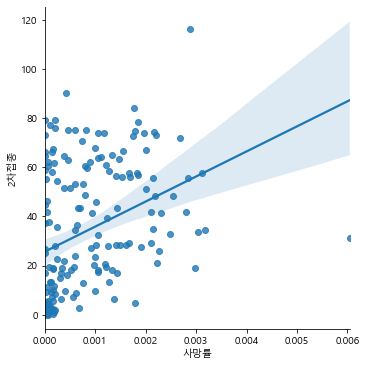

In [28]:
sns.lmplot(x='사망률', y='2차접종', data=corona)

### 백신 접종률과 사망률은 0.324의 양의 상관관계를 갖는다.
 * 데이터로 봤을 때, 이 부분에 대한 확인이 필요해 보인다.

### 2-2 백신 접종률과 중증 감소의 관계는 어떠한가?

In [29]:
corona.head(3)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률
0,미국,U.S.,64.4,55.8,13.0,52.5,0.133098,701422.0,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,(-523),44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1,0.002149
1,인도,India,46.7,16.8,103.0,119.0,0.024434,7178901.0,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,NaN,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0,0.000325
2,브라질,Brazil,71.3,41.9,29.0,70.5,0.100592,1317163.0,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,NaN,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5,0.002802


### Learn02. Pandas 문자열 처리
 * [].str.strip() : 앞뒤 공백을 제거
 * [].str.lstrip() : 앞 공백을 제거
 * [].str.rstrip() : 뒤 공백을 제거
 * [].str.split('구분자', n=1, expand=True)  : 구분자를 기준으로 n개로 나눈다. expand=True(여러컬럼), False(하나의 컬럼)

In [32]:
### 사망률 = 사망자수/인구수
corona['위중증률'] = corona['위중증합계'] /  corona['인구수']
corona.head(15)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률
0,미국,U.S.,64.4,55.8,13.0,52.5,0.133098,701422.0,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,(-523),44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1,0.002149,0.000064
1,인도,India,46.7,16.8,103.0,119.0,0.024434,7178901.0,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,NaN,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0,0.000325,0.000006
2,브라질,Brazil,71.3,41.9,29.0,70.5,0.100592,1317163.0,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,NaN,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5,0.002802,0.000039
3,영국,U.K.,73.0,67.1,20.0,24.0,0.113959,63126.0,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,(-47),7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0,0.002009,0.000012
4,러시아,Russia,32.6,28.5,77.0,89.0,0.051305,214966.0,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,NaN,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6,0.001414,0.000016
5,터키,Turkey,64.5,53.0,44.0,57.0,0.084132,381129.0,0.9,92.4,84132,84339067,479198.0,-1683.0,633.0,NaN,7095580,28892.0,63611,239.0,6552771.0,30336.0,108761680.0,65.4,0.000754,0.000008
6,프랑스,France,77.4,74.6,23.0,12.0,0.107278,229555.0,1.7,96.4,107278,65273511,135537.0,-6063.0,1609.0,NaN,7002393,6765.0,116615,78.0,6750241.0,12750.0,94250530.0,72.7,0.001787,0.000025
7,이란,Iran,35.5,16.8,62.0,119.0,0.066350,1368407.0,2.2,89.9,66350,83992949,443129.0,-8565.0,6016.0,(-108),5572962,13271.0,120160,272.0,5009673.0,21564.0,43372270.0,26.0,0.001431,0.000072
8,아르헨티나,Argentina,65.7,48.3,18.0,62.0,0.116245,222650.0,2.2,97.4,116245,45195774,23643.0,260.0,1184.0,(-16),5253765,1825.0,115038,84.0,5115084.0,1481.0,51222136.0,57.0,0.002545,0.000026
9,콜롬비아,Colombia,51.4,32.8,33.0,84.0,0.097368,169329.0,2.5,96.8,97368,50882891,32182.0,-943.0,542.0,NaN,4954376,1686.0,126219,41.0,4795975.0,2588.0,39701908.0,39.4,0.002481,0.000011


### 에러 발생 
 * TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Learn 03. 데이터 타입 변경하기

 * [].astype(dtype) :  모든 열의 데이터 타입을 변경
 * [].astype( {'컬럼명':dtype} ) : 특정 컬럼의 데이터 타입을 변경
   * str, int, float, category 등
   * int8, int16, int32, int64와 같이 변경 가능

In [33]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글(국가명)    177 non-null    object 
 1   영문(블룸버그)   177 non-null    object 
 2   1차접종       177 non-null    float64
 3   2차접종       177 non-null    float64
 4   발생률순위      177 non-null    float64
 5   2차접종률순위    177 non-null    float64
 6   확진자비율(인구)  177 non-null    float64
 7   일별접종수      177 non-null    float64
 8   치명(%)      177 non-null    object 
 9   완치(%)      174 non-null    float64
 10  발생률        177 non-null    int64  
 11  인구수        177 non-null    int64  
 12  치료중합계      174 non-null    float64
 13  치료중1일      145 non-null    float64
 14  위중증합계      131 non-null    float64
 15  위중증1일      54 non-null     object 
 16  확진자합계      177 non-null    int64  
 17  확진자1일      146 non-null    float64
 18  사망자합계      177 non-null    int64  
 19  사망자1일      114 non-null    float64
 20  완치합계      

In [34]:
corona['위중증합계'] = corona['위중증합계'].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

### 에러 발생 
 * ValueError: cannot convert float NaN to integer

In [35]:
corona['위중증합계'].unique()

array([2.1296e+04, 8.9440e+03, 8.3180e+03, 8.3100e+02, 2.3000e+03,
       6.3300e+02, 1.6090e+03, 6.0160e+03, 1.1840e+03, 5.4200e+02,
       7.7100e+02, 4.5900e+02, 1.4350e+03,        nan, 4.7980e+03,
       1.7400e+02, 3.1700e+03, 1.7700e+02, 9.8500e+02, 1.0210e+03,
       1.5500e+02, 4.9700e+02, 1.0020e+03, 3.8000e+01, 3.8600e+02,
       7.7600e+02, 3.3240e+03, 1.4080e+03, 6.5900e+02, 3.9480e+03,
       2.0600e+02, 1.3200e+03, 3.7000e+01, 6.8000e+01, 2.4300e+02,
       4.9800e+02, 2.2100e+02, 4.2100e+02, 1.8600e+02, 8.1000e+01,
       4.8000e+02, 2.2600e+02, 2.9500e+02, 3.2200e+02, 2.0000e+02,
       5.0000e+00, 2.2400e+02, 4.4900e+02, 7.5900e+02, 2.2000e+02,
       6.1000e+01, 2.1000e+01, 1.0000e+01, 1.1900e+02, 9.9000e+01,
       1.3000e+01, 6.3000e+01, 6.8100e+02, 4.1800e+02, 1.6000e+01,
       7.8000e+02, 2.1400e+02, 3.3100e+02, 2.0000e+01, 9.0000e+01,
       1.9200e+02, 7.4000e+01, 9.2000e+01, 1.5000e+01, 2.5000e+01,
       1.1000e+01, 1.4000e+01, 2.3000e+01, 1.3100e+02, 1.0000e

### Learn 04. 어떻게 NaN을 체크할 것인가?

In [36]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글(국가명)    177 non-null    object 
 1   영문(블룸버그)   177 non-null    object 
 2   1차접종       177 non-null    float64
 3   2차접종       177 non-null    float64
 4   발생률순위      177 non-null    float64
 5   2차접종률순위    177 non-null    float64
 6   확진자비율(인구)  177 non-null    float64
 7   일별접종수      177 non-null    float64
 8   치명(%)      177 non-null    object 
 9   완치(%)      174 non-null    float64
 10  발생률        177 non-null    int64  
 11  인구수        177 non-null    int64  
 12  치료중합계      174 non-null    float64
 13  치료중1일      145 non-null    float64
 14  위중증합계      131 non-null    float64
 15  위중증1일      54 non-null     object 
 16  확진자합계      177 non-null    int64  
 17  확진자1일      146 non-null    float64
 18  사망자합계      177 non-null    int64  
 19  사망자1일      114 non-null    float64
 20  완치합계      

### 위중증_수가 isnull()인 것을 살펴보기

In [46]:
corona[  corona['위중증합계'].isnull() ].head(10)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2
13,인도네시아,Indonesia,32.9,18.4,111.0,114.5,0.015404,1916012.0,3.4,95.7,15404,273523615,37412.0,-1240.0,NaN,NaN,4213414,1954.0,141826,117.0,4034176.0,3077.0,139232210.0,26.1,0.000519,-0.000366,-99999
41,네팔,Nepal,23.9,21.7,99.0,103.0,0.027256,186712.0,1.4,96.3,27256,29136808,18193.0,-229.0,NaN,NaN,794163,892.0,11123,8.0,764847.0,1113.0,13166598.0,23.1,0.000382,-0.003432,-99999
42,베트남,Vietnam,32.1,8.6,123.0,135.0,0.008007,621033.0,2.5,74.9,8007,97338579,176791.0,-14972.0,NaN,NaN,779398,8758.0,19098,162.0,583509.0,23568.0,39232772.0,20.3,0.000196,-0.001027,-99999
44,아랍에미레이트,UAE,85.9,76.1,56.0,8.0,0.074388,59157.0,0.3,99.0,74388,9890402,5437.0,-81.0,NaN,NaN,735727,270.0,2095,1.0,728195.0,350.0,19963360.0,92.9,0.000212,-0.010111,-99999
48,조지아,Georgia,26.2,21.1,9.0,104.0,0.153232,12798.0,1.5,95.3,153232,3989167,19547.0,-18.0,NaN,NaN,611269,1929.0,8917,33.0,582805.0,1914.0,1760878.0,23.6,0.002235,-0.025068,-99999
51,벨라루스,Belarus,19.8,16.0,74.0,121.0,0.056734,26145.0,0.8,96.5,56734,9449323,14658.0,698.0,NaN,NaN,536097,1993.0,4114,NaN,517325.0,1295.0,3389520.0,17.9,0.000435,-0.010583,-99999
53,스리랑카,Sri Lanka,66.0,53.3,104.0,56.0,0.024075,167003.0,2.5,88.5,24075,21413249,46651.0,134.0,NaN,NaN,515524,932.0,12786,55.0,456087.0,743.0,26096108.0,59.8,0.000597,-0.004670,-99999
57,아제르바이잔,Azerbaijan,47.2,36.4,83.0,78.0,0.047479,53286.0,1.3,94.1,47479,10139177,21957.0,NaN,NaN,NaN,481401,NaN,6476,NaN,452968.0,NaN,8350575.0,41.8,0.000639,-0.009863,-99999
59,미얀마,Myanmar,10.5,6.6,122.0,138.0,0.008474,163440.0,3.8,90.1,8474,54409800,28059.0,27.0,NaN,NaN,461066,1630.0,17631,48.0,415376.0,1555.0,9001616.0,8.5,0.000324,-0.001838,-99999
70,리비아,Libya,20.7,2.8,82.0,149.0,0.049375,11651.0,1.4,76.2,49375,6871292,76059.0,-1093.0,NaN,NaN,339269,1379.0,4636,19.0,258574.0,2453.0,1546967.0,11.8,0.000675,-0.014553,-99999


In [38]:
corona['위중증합계'].isnull().sum()

46

In [39]:
corona['위중증합계'].isna().sum()

46

### (의문) 왜 47개국은 위증증 통계가 없을까?

### 위증증_수2를 만들고, 위증증수가 없는 것은 -99999로 만들자.

In [40]:
corona['위중증합계2'] = corona['위중증합계'].copy()

In [41]:
corona.loc[ corona['위중증합계2'].isnull(), "위중증합계2"] = -99999
corona[  corona['위중증합계2'].isnull() ] 

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2


In [43]:
corona['위중증합계2'] = corona['위중증합계2'].astype('int64')

In [45]:
### 사망률 = 사망자수/인구수
corona['위중증률'] = corona['위중증합계2'] /  corona['인구수']
corona.head(10)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2
0,미국,U.S.,64.4,55.8,13.0,52.5,0.133098,701422.0,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,(-523),44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1,0.002149,0.000064,21296
1,인도,India,46.7,16.8,103.0,119.0,0.024434,7178901.0,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,NaN,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0,0.000325,0.000006,8944
2,브라질,Brazil,71.3,41.9,29.0,70.5,0.100592,1317163.0,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,NaN,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5,0.002802,0.000039,8318
3,영국,U.K.,73.0,67.1,20.0,24.0,0.113959,63126.0,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,(-47),7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0,0.002009,0.000012,831
4,러시아,Russia,32.6,28.5,77.0,89.0,0.051305,214966.0,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,NaN,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6,0.001414,0.000016,2300
5,터키,Turkey,64.5,53.0,44.0,57.0,0.084132,381129.0,0.9,92.4,84132,84339067,479198.0,-1683.0,633.0,NaN,7095580,28892.0,63611,239.0,6552771.0,30336.0,108761680.0,65.4,0.000754,0.000008,633
6,프랑스,France,77.4,74.6,23.0,12.0,0.107278,229555.0,1.7,96.4,107278,65273511,135537.0,-6063.0,1609.0,NaN,7002393,6765.0,116615,78.0,6750241.0,12750.0,94250530.0,72.7,0.001787,0.000025,1609
7,이란,Iran,35.5,16.8,62.0,119.0,0.066350,1368407.0,2.2,89.9,66350,83992949,443129.0,-8565.0,6016.0,(-108),5572962,13271.0,120160,272.0,5009673.0,21564.0,43372270.0,26.0,0.001431,0.000072,6016
8,아르헨티나,Argentina,65.7,48.3,18.0,62.0,0.116245,222650.0,2.2,97.4,116245,45195774,23643.0,260.0,1184.0,(-16),5253765,1825.0,115038,84.0,5115084.0,1481.0,51222136.0,57.0,0.002545,0.000026,1184
9,콜롬비아,Colombia,51.4,32.8,33.0,84.0,0.097368,169329.0,2.5,96.8,97368,50882891,32182.0,-943.0,542.0,NaN,4954376,1686.0,126219,41.0,4795975.0,2588.0,39701908.0,39.4,0.002481,0.000011,542


In [48]:
corona.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)',
       '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계',
       '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)', '사망률', '위중증률', '위중증합계2'],
      dtype='object')

In [53]:
corona_sel = ['한글(국가명)', '발생률', '사망률', '위중증률', '인구수', '확진자비율(인구)',
              '1차접종', '2차접종', '확진자합계', '위중증합계', '치료중합계', '위중증합계2',
              '치료중1일', '위중증1일', '확진자1일', ]
corona_part = corona[corona_sel]
corona_part.head(10)

,한글(국가명),발생률,사망률,위중증률,인구수,확진자비율(인구),1차접종,2차접종,확진자합계,위중증합계,치료중합계,위중증합계2,치료중1일,위중증1일,확진자1일
0,미국,133098,0.002149,0.000064,331002651,0.133098,64.4,55.8,44055692,21296.0,9823512.0,21296,-14871.0,(-523),113357.0
1,인도,24434,0.000325,0.000006,1380004385,0.024434,46.7,16.8,33718984,8944.0,284976.0,8944,-4806.0,NaN,4743.0
2,브라질,100592,0.002802,0.000039,212559417,0.100592,71.3,41.9,21381790,8318.0,403027.0,8318,-7475.0,NaN,15395.0
3,영국,113959,0.002009,0.000012,67886011,0.113959,73.0,67.1,7736235,831.0,1344510.0,831,-1886.0,(-47),34520.0
4,러시아,51305,0.001414,0.000016,145934462,0.051305,32.6,28.5,7487138,2300.0,626809.0,2300,3117.0,NaN,22430.0
5,터키,84132,0.000754,0.000008,84339067,0.084132,64.5,53.0,7095580,633.0,479198.0,633,-1683.0,NaN,28892.0
6,프랑스,107278,0.001787,0.000025,65273511,0.107278,77.4,74.6,7002393,1609.0,135537.0,1609,-6063.0,NaN,6765.0
7,이란,66350,0.001431,0.000072,83992949,0.066350,35.5,16.8,5572962,6016.0,443129.0,6016,-8565.0,(-108),13271.0
8,아르헨티나,116245,0.002545,0.000026,45195774,0.116245,65.7,48.3,5253765,1184.0,23643.0,1184,260.0,(-16),1825.0
9,콜롬비아,97368,0.002481,0.000011,50882891,0.097368,51.4,32.8,4954376,542.0,32182.0,542,-943.0,NaN,1686.0


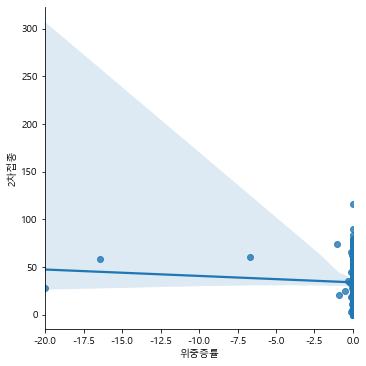

In [54]:
sns.lmplot(x='위중증률', y='2차접종', data=corona_part)

In [55]:
corona_part[['위중증률', '2차접종']].corr()

,위중증률,2차접종
위중증률,1.000000,-0.050268
2차접종,-0.050268,1.000000


### 결과 확인 : 인구당 접종률과 위중증률은 거의 관계가 없다.

### 오류가 없을까?
 * 오류: -99999 데이터가 있었기에 정확하지 않을 수 있다.

In [56]:
corona_part['위중증합계'].notnull().sum()

131

In [57]:
corona_part = corona_part[ corona_part['위중증합계'].notnull() ] 
corona_part['위중증합계'].isnull().sum()

0

In [58]:
corona_part[['위중증률', '2차접종']].corr()

,위중증률,2차접종
위중증률,1.000000,0.231575
2차접종,0.231575,1.000000


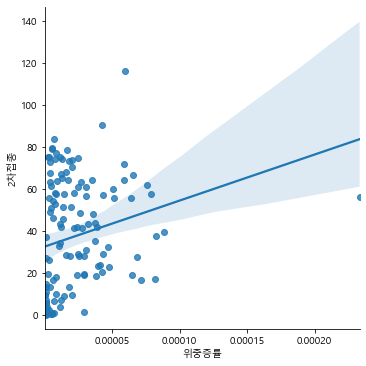

In [59]:
sns.lmplot(x='위중증률', y='2차접종', data=corona_part)

### 확인 : 데이터가 있는 131개국의 인구당 접종률과 위중증률은 0.2755로 양의 상관관계를 갖는다.

In [61]:
corona.head(10)

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2
0,미국,U.S.,64.4,55.8,13.0,52.5,0.133098,701422.0,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,(-523),44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1,0.002149,0.000064,21296
1,인도,India,46.7,16.8,103.0,119.0,0.024434,7178901.0,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,NaN,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0,0.000325,0.000006,8944
2,브라질,Brazil,71.3,41.9,29.0,70.5,0.100592,1317163.0,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,NaN,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5,0.002802,0.000039,8318
3,영국,U.K.,73.0,67.1,20.0,24.0,0.113959,63126.0,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,(-47),7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0,0.002009,0.000012,831
4,러시아,Russia,32.6,28.5,77.0,89.0,0.051305,214966.0,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,NaN,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6,0.001414,0.000016,2300
5,터키,Turkey,64.5,53.0,44.0,57.0,0.084132,381129.0,0.9,92.4,84132,84339067,479198.0,-1683.0,633.0,NaN,7095580,28892.0,63611,239.0,6552771.0,30336.0,108761680.0,65.4,0.000754,0.000008,633
6,프랑스,France,77.4,74.6,23.0,12.0,0.107278,229555.0,1.7,96.4,107278,65273511,135537.0,-6063.0,1609.0,NaN,7002393,6765.0,116615,78.0,6750241.0,12750.0,94250530.0,72.7,0.001787,0.000025,1609
7,이란,Iran,35.5,16.8,62.0,119.0,0.066350,1368407.0,2.2,89.9,66350,83992949,443129.0,-8565.0,6016.0,(-108),5572962,13271.0,120160,272.0,5009673.0,21564.0,43372270.0,26.0,0.001431,0.000072,6016
8,아르헨티나,Argentina,65.7,48.3,18.0,62.0,0.116245,222650.0,2.2,97.4,116245,45195774,23643.0,260.0,1184.0,(-16),5253765,1825.0,115038,84.0,5115084.0,1481.0,51222136.0,57.0,0.002545,0.000026,1184
9,콜롬비아,Colombia,51.4,32.8,33.0,84.0,0.097368,169329.0,2.5,96.8,97368,50882891,32182.0,-943.0,542.0,NaN,4954376,1686.0,126219,41.0,4795975.0,2588.0,39701908.0,39.4,0.002481,0.000011,542


### 실습과제 : 인구 100만 이상의 국가에 대해서 다시 수행해 보자.
  * 접종률과 인구당 발생률 관계 확인
  * 접종률과 사망률과 중증률 관계 확인

### 의문 : 그렇다면 전체 국가가 아닌 30개의 국가의 데이터를 확인해 보면 어떨까?

## 02. 접종률이 높은 30개의 국가의 데이터를 확인해 보기

In [62]:
corona_top30 = corona[corona['2차접종률순위']<=30]
corona_top30.shape

(30, 27)

In [63]:
corona_top30

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2
3,영국,U.K.,73.0,67.1,20.0,24.0,0.113959,63126.0,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,(-47),7736235,34520.0,136375,167.0,6255350.0,36239.0,9.356547e+07,70.0,0.002009,0.000012,831
6,프랑스,France,77.4,74.6,23.0,12.0,0.107278,229555.0,1.7,96.4,107278,65273511,135537.0,-6063.0,1609.0,NaN,7002393,6765.0,116615,78.0,6750241.0,12750.0,9.425053e+07,72.7,0.001787,0.000025,1609
10,스페인,Spain,81.0,78.5,26.0,6.0,0.105956,72816.0,1.7,95.8,105956,46754778,122061.0,-7259.0,771.0,(-66),4953930,2290.0,86358,60.0,4745511.0,9489.0,6.993675e+07,75.2,0.001847,0.000016,771
11,이탈리아,Italy,74.5,74.5,51.0,13.0,0.077157,211345.0,2.8,95.1,77157,60461826,98872.0,-2208.0,459.0,(-29),4665049,2962.0,130807,65.0,4435370.0,5105.0,8.435156e+07,69.9,0.002163,0.000008,459
24,칠레,Chile,78.5,73.8,41.0,16.0,0.086492,109701.0,2.3,97.3,86492,19116201,6944.0,182.0,386.0,(-3),1653406,611.0,37455,6.0,1609007.0,423.0,3.155368e+07,82.6,0.001959,0.000020,386
25,캐나다,Canada,76.2,70.6,86.0,21.0,0.042813,105929.0,1.7,95.5,42813,37742154,44777.0,-1676.0,776.0,(+138),1615859,3428.0,27754,56.0,1543328.0,5048.0,5.603610e+07,74.7,0.000735,0.000021,776
30,벨기에,Belgium,74.8,73.2,24.0,17.0,0.107012,22185.0,2.1,92.9,107012,11589623,62296.0,1861.0,206.0,NaN,1240232,1874.0,25581,13.0,1152355.0,NaN,1.664413e+07,72.6,0.002207,0.000018,206
33,포르투갈,Portugal,86.9,84.0,27.0,3.0,0.104792,23657.0,1.7,95.5,104792,10196709,30495.0,-52.0,68.0,(-6),1068530,755.0,17968,6.0,1020067.0,801.0,1.595086e+07,77.6,0.001762,0.000007,68
44,아랍에미레이트,UAE,85.9,76.1,56.0,8.0,0.074388,59157.0,0.3,99.0,74388,9890402,5437.0,-81.0,NaN,NaN,735727,270.0,2095,1.0,728195.0,350.0,1.996336e+07,92.9,0.000212,-0.010111,-99999
64,우루과이,Uruguay,77.7,72.9,21.0,19.0,0.111897,20806.0,1.6,98.1,111897,3473730,1332.0,3.0,13.0,NaN,388700,128.0,6053,NaN,381315.0,125.0,6.214949e+06,88.3,0.001743,0.000004,13


### Learn 05. 데이터의 인덱스를 다시 재설정하기

* [].reset_index(inplace=True)

In [64]:
corona_top30.reset_index(inplace=True)
corona_top30

,index,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2
0,3,영국,U.K.,73.0,67.1,20.0,24.0,0.113959,63126.0,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,(-47),7736235,34520.0,136375,167.0,6255350.0,36239.0,9.356547e+07,70.0,0.002009,0.000012,831
1,6,프랑스,France,77.4,74.6,23.0,12.0,0.107278,229555.0,1.7,96.4,107278,65273511,135537.0,-6063.0,1609.0,NaN,7002393,6765.0,116615,78.0,6750241.0,12750.0,9.425053e+07,72.7,0.001787,0.000025,1609
2,10,스페인,Spain,81.0,78.5,26.0,6.0,0.105956,72816.0,1.7,95.8,105956,46754778,122061.0,-7259.0,771.0,(-66),4953930,2290.0,86358,60.0,4745511.0,9489.0,6.993675e+07,75.2,0.001847,0.000016,771
3,11,이탈리아,Italy,74.5,74.5,51.0,13.0,0.077157,211345.0,2.8,95.1,77157,60461826,98872.0,-2208.0,459.0,(-29),4665049,2962.0,130807,65.0,4435370.0,5105.0,8.435156e+07,69.9,0.002163,0.000008,459
4,24,칠레,Chile,78.5,73.8,41.0,16.0,0.086492,109701.0,2.3,97.3,86492,19116201,6944.0,182.0,386.0,(-3),1653406,611.0,37455,6.0,1609007.0,423.0,3.155368e+07,82.6,0.001959,0.000020,386
5,25,캐나다,Canada,76.2,70.6,86.0,21.0,0.042813,105929.0,1.7,95.5,42813,37742154,44777.0,-1676.0,776.0,(+138),1615859,3428.0,27754,56.0,1543328.0,5048.0,5.603610e+07,74.7,0.000735,0.000021,776
6,30,벨기에,Belgium,74.8,73.2,24.0,17.0,0.107012,22185.0,2.1,92.9,107012,11589623,62296.0,1861.0,206.0,NaN,1240232,1874.0,25581,13.0,1152355.0,NaN,1.664413e+07,72.6,0.002207,0.000018,206
7,33,포르투갈,Portugal,86.9,84.0,27.0,3.0,0.104792,23657.0,1.7,95.5,104792,10196709,30495.0,-52.0,68.0,(-6),1068530,755.0,17968,6.0,1020067.0,801.0,1.595086e+07,77.6,0.001762,0.000007,68
8,44,아랍에미레이트,UAE,85.9,76.1,56.0,8.0,0.074388,59157.0,0.3,99.0,74388,9890402,5437.0,-81.0,NaN,NaN,735727,270.0,2095,1.0,728195.0,350.0,1.996336e+07,92.9,0.000212,-0.010111,-99999
9,64,우루과이,Uruguay,77.7,72.9,21.0,19.0,0.111897,20806.0,1.6,98.1,111897,3473730,1332.0,3.0,13.0,NaN,388700,128.0,6053,NaN,381315.0,125.0,6.214949e+06,88.3,0.001743,0.000004,13


### Learn 06. 데이터를 정렬시키기 2가지
 * sort_index() : 인덱스를 기준으로 정렬
 * sort_values(by=[], ascending=False, axis=0,1, inplace=True or False) : 컬럼의 값을 기준으로 데이터 정렬
   * by : 정렬할 열 선택
   * axis : 0 : index, 1: columns

In [65]:
corona_top30.columns

Index(['index', '한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위',
       '확진자비율(인구)', '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일',
       '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일',
       '백신접종수', '백신보유율(인구)', '사망률', '위중증률', '위중증합계2'],
      dtype='object')

In [66]:
corona_sel = ['한글(국가명)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)',
              '발생률', '인구수', '치료중합계', '위중증합계', '확진자합계', '사망자합계', 
              '사망률', '위중증률']
corona_top30_part = corona_top30[corona_sel]
corona_top30_part

,한글(국가명),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),발생률,인구수,치료중합계,위중증합계,확진자합계,사망자합계,사망률,위중증률
0,영국,73.0,67.1,20.0,24.0,0.113959,113959,67886011,1344510.0,831.0,7736235,136375,0.002009,0.000012
1,프랑스,77.4,74.6,23.0,12.0,0.107278,107278,65273511,135537.0,1609.0,7002393,116615,0.001787,0.000025
2,스페인,81.0,78.5,26.0,6.0,0.105956,105956,46754778,122061.0,771.0,4953930,86358,0.001847,0.000016
3,이탈리아,74.5,74.5,51.0,13.0,0.077157,77157,60461826,98872.0,459.0,4665049,130807,0.002163,0.000008
4,칠레,78.5,73.8,41.0,16.0,0.086492,86492,19116201,6944.0,386.0,1653406,37455,0.001959,0.000020
5,캐나다,76.2,70.6,86.0,21.0,0.042813,42813,37742154,44777.0,776.0,1615859,27754,0.000735,0.000021
6,벨기에,74.8,73.2,24.0,17.0,0.107012,107012,11589623,62296.0,206.0,1240232,25581,0.002207,0.000018
7,포르투갈,86.9,84.0,27.0,3.0,0.104792,104792,10196709,30495.0,68.0,1068530,17968,0.001762,0.000007
8,아랍에미레이트,85.9,76.1,56.0,8.0,0.074388,74388,9890402,5437.0,NaN,735727,2095,0.000212,-0.010111
9,우루과이,77.7,72.9,21.0,19.0,0.111897,111897,3473730,1332.0,13.0,388700,6053,0.001743,0.000004


In [67]:
# 접종률_순위 을 기준으로 정렬, 내림차순
corona_top30_part_sorted = corona_top30_part.sort_values(by=['2차접종률순위'], ascending=True)

In [68]:
corona_top30_part_sorted

,한글(국가명),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),발생률,인구수,치료중합계,위중증합계,확진자합계,사망자합계,사망률,위중증률
25,지브롤터,117.4,116.4,4.0,1.0,0.164198,164198,33691,62.0,2.0,5532,97,0.002879,0.000059
19,몰디브,105.3,90.3,8.0,2.0,0.156470,156470,540544,1579.0,23.0,84579,231,0.000427,0.000043
7,포르투갈,86.9,84.0,27.0,3.0,0.104792,104792,10196709,30495.0,68.0,1068530,17968,0.001762,0.000007
14,카타르,84.4,79.4,48.0,4.0,0.082108,82108,2881053,1282.0,15.0,236558,605,0.000210,0.000005
18,싱가포르,82.1,79.2,110.0,5.0,0.015687,15687,5850342,15469.0,30.0,91775,85,0.000015,0.000005
2,스페인,81.0,78.5,26.0,6.0,0.105956,105956,46754778,122061.0,771.0,4953930,86358,0.001847,0.000016
23,아이슬란드,78.8,77.2,92.0,7.0,0.034462,34462,341243,355.0,3.0,11760,33,0.000097,0.000009
8,아랍에미레이트,85.9,76.1,56.0,8.0,0.074388,74388,9890402,5437.0,NaN,735727,2095,0.000212,-0.010111
24,맨섬,77.0,75.1,39.0,9.5,0.088319,88319,85033,363.0,1.0,7510,51,0.000600,0.000012
11,덴마크,76.7,75.1,67.0,9.5,0.061871,61871,5792202,4939.0,16.0,358369,2654,0.000458,0.000003


In [69]:
corona_top30_part_sorted.reset_index(inplace=True)

In [70]:
corona_top30_part_sorted

,index,한글(국가명),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),발생률,인구수,치료중합계,위중증합계,확진자합계,사망자합계,사망률,위중증률
0,25,지브롤터,117.4,116.4,4.0,1.0,0.164198,164198,33691,62.0,2.0,5532,97,0.002879,0.000059
1,19,몰디브,105.3,90.3,8.0,2.0,0.156470,156470,540544,1579.0,23.0,84579,231,0.000427,0.000043
2,7,포르투갈,86.9,84.0,27.0,3.0,0.104792,104792,10196709,30495.0,68.0,1068530,17968,0.001762,0.000007
3,14,카타르,84.4,79.4,48.0,4.0,0.082108,82108,2881053,1282.0,15.0,236558,605,0.000210,0.000005
4,18,싱가포르,82.1,79.2,110.0,5.0,0.015687,15687,5850342,15469.0,30.0,91775,85,0.000015,0.000005
5,2,스페인,81.0,78.5,26.0,6.0,0.105956,105956,46754778,122061.0,771.0,4953930,86358,0.001847,0.000016
6,23,아이슬란드,78.8,77.2,92.0,7.0,0.034462,34462,341243,355.0,3.0,11760,33,0.000097,0.000009
7,8,아랍에미레이트,85.9,76.1,56.0,8.0,0.074388,74388,9890402,5437.0,NaN,735727,2095,0.000212,-0.010111
8,24,맨섬,77.0,75.1,39.0,9.5,0.088319,88319,85033,363.0,1.0,7510,51,0.000600,0.000012
9,11,덴마크,76.7,75.1,67.0,9.5,0.061871,61871,5792202,4939.0,16.0,358369,2654,0.000458,0.000003


### 상관관계 확인하기

In [71]:
corona_top30_part_sorted[['2차접종', '확진자비율(인구)']].corr()

,2차접종,확진자비율(인구)
2차접종,1.00000,0.35383
확진자비율(인구),0.35383,1.00000


In [72]:
corona_top30_part_sorted[['2차접종', '사망률']].corr()

,2차접종,사망률
2차접종,1.000000,0.333328
사망률,0.333328,1.000000


In [73]:
corona_top30_part_sorted[['2차접종', '위중증률']].corr()

,2차접종,위중증률
2차접종,1.000000,0.027912
위중증률,0.027912,1.000000


### 접종률 상위 30개국의 데이터 확인 결과 큰 연관관계가 보이지 않는다.

### 실습 : 위증증 데이터는 처리가 안되었다. 이를 처리해 보자.

### 03. 200만 이상의 국가에 대해서 확인

In [74]:
corona_200m = corona[corona['인구수']>=2000000]
corona_200m.shape

(136, 27)

In [75]:
corona_200m.reset_index(inplace=True)
corona_200m.head(10)

,index,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),사망률,위중증률,위중증합계2
0,0,미국,U.S.,64.4,55.8,13.0,52.5,0.133098,701422.0,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,(-523),44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1,0.002149,0.000064,21296
1,1,인도,India,46.7,16.8,103.0,119.0,0.024434,7178901.0,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,NaN,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0,0.000325,0.000006,8944
2,2,브라질,Brazil,71.3,41.9,29.0,70.5,0.100592,1317163.0,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,NaN,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5,0.002802,0.000039,8318
3,3,영국,U.K.,73.0,67.1,20.0,24.0,0.113959,63126.0,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,(-47),7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0,0.002009,0.000012,831
4,4,러시아,Russia,32.6,28.5,77.0,89.0,0.051305,214966.0,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,NaN,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6,0.001414,0.000016,2300
5,5,터키,Turkey,64.5,53.0,44.0,57.0,0.084132,381129.0,0.9,92.4,84132,84339067,479198.0,-1683.0,633.0,NaN,7095580,28892.0,63611,239.0,6552771.0,30336.0,108761680.0,65.4,0.000754,0.000008,633
6,6,프랑스,France,77.4,74.6,23.0,12.0,0.107278,229555.0,1.7,96.4,107278,65273511,135537.0,-6063.0,1609.0,NaN,7002393,6765.0,116615,78.0,6750241.0,12750.0,94250530.0,72.7,0.001787,0.000025,1609
7,7,이란,Iran,35.5,16.8,62.0,119.0,0.066350,1368407.0,2.2,89.9,66350,83992949,443129.0,-8565.0,6016.0,(-108),5572962,13271.0,120160,272.0,5009673.0,21564.0,43372270.0,26.0,0.001431,0.000072,6016
8,8,아르헨티나,Argentina,65.7,48.3,18.0,62.0,0.116245,222650.0,2.2,97.4,116245,45195774,23643.0,260.0,1184.0,(-16),5253765,1825.0,115038,84.0,5115084.0,1481.0,51222136.0,57.0,0.002545,0.000026,1184
9,9,콜롬비아,Colombia,51.4,32.8,33.0,84.0,0.097368,169329.0,2.5,96.8,97368,50882891,32182.0,-943.0,542.0,NaN,4954376,1686.0,126219,41.0,4795975.0,2588.0,39701908.0,39.4,0.002481,0.000011,542


In [76]:
corona_200m.columns

Index(['index', '한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위',
       '확진자비율(인구)', '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일',
       '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일',
       '백신접종수', '백신보유율(인구)', '사망률', '위중증률', '위중증합계2'],
      dtype='object')

In [77]:
corona_sel = ['한글(국가명)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)',
              '발생률', '인구수', '치료중합계', '위중증합계', '확진자합계', '사망자합계', 
              '사망률', '위중증률']
corona_200m_part = corona_200m[corona_sel]
corona_200m_part.head(10)


,한글(국가명),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),발생률,인구수,치료중합계,위중증합계,확진자합계,사망자합계,사망률,위중증률
0,미국,64.4,55.8,13.0,52.5,0.133098,133098,331002651,9823512.0,21296.0,44055692,711222,0.002149,0.000064
1,인도,46.7,16.8,103.0,119.0,0.024434,24434,1380004385,284976.0,8944.0,33718984,447828,0.000325,0.000006
2,브라질,71.3,41.9,29.0,70.5,0.100592,100592,212559417,403027.0,8318.0,21381790,595520,0.002802,0.000039
3,영국,73.0,67.1,20.0,24.0,0.113959,113959,67886011,1344510.0,831.0,7736235,136375,0.002009,0.000012
4,러시아,32.6,28.5,77.0,89.0,0.051305,51305,145934462,626809.0,2300.0,7487138,206388,0.001414,0.000016
5,터키,64.5,53.0,44.0,57.0,0.084132,84132,84339067,479198.0,633.0,7095580,63611,0.000754,0.000008
6,프랑스,77.4,74.6,23.0,12.0,0.107278,107278,65273511,135537.0,1609.0,7002393,116615,0.001787,0.000025
7,이란,35.5,16.8,62.0,119.0,0.066350,66350,83992949,443129.0,6016.0,5572962,120160,0.001431,0.000072
8,아르헨티나,65.7,48.3,18.0,62.0,0.116245,116245,45195774,23643.0,1184.0,5253765,115038,0.002545,0.000026
9,콜롬비아,51.4,32.8,33.0,84.0,0.097368,97368,50882891,32182.0,542.0,4954376,126219,0.002481,0.000011


In [78]:
corona_200m_part_sorted = corona_200m_part.sort_values(by=['2차접종'], ascending=False)
corona_200m_part_sorted.head(10)


,한글(국가명),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),발생률,인구수,치료중합계,위중증합계,확진자합계,사망자합계,사망률,위중증률
33,포르투갈,86.9,84.0,27.0,3.0,0.104792,104792,10196709,30495.0,68.0,1068530,17968,0.001762,0.000007
80,카타르,84.4,79.4,48.0,4.0,0.082108,82108,2881053,1282.0,15.0,236558,605,0.000210,0.000005
102,싱가포르,82.1,79.2,110.0,5.0,0.015687,15687,5850342,15469.0,30.0,91775,85,0.000015,0.000005
10,스페인,81.0,78.5,26.0,6.0,0.105956,105956,46754778,122061.0,771.0,4953930,86358,0.001847,0.000016
44,아랍에미레이트,85.9,76.1,56.0,8.0,0.074388,74388,9890402,5437.0,NaN,735727,2095,0.000212,-0.010111
68,덴마크,76.7,75.1,67.0,9.5,0.061871,61871,5792202,4939.0,16.0,358369,2654,0.000458,0.000003
6,프랑스,77.4,74.6,23.0,12.0,0.107278,107278,65273511,135537.0,1609.0,7002393,116615,0.001787,0.000025
11,이탈리아,74.5,74.5,51.0,13.0,0.077157,77157,60461826,98872.0,459.0,4665049,130807,0.002163,0.000008
65,아일랜드,76.1,74.1,50.0,14.5,0.078419,78419,4937786,40804.0,63.0,387218,5209,0.001055,0.000013
24,칠레,78.5,73.8,41.0,16.0,0.086492,86492,19116201,6944.0,386.0,1653406,37455,0.001959,0.000020


### 상관관계 확인하기

In [79]:
corona_200m_part_sorted[['2차접종', '확진자비율(인구)']].corr()

,2차접종,확진자비율(인구)
2차접종,1.000000,0.609693
확진자비율(인구),0.609693,1.000000


In [80]:
corona_200m_part_sorted[['2차접종', '사망률']].corr()

,2차접종,사망률
2차접종,1.000000,0.401412
사망률,0.401412,1.000000


In [81]:
corona_200m_part_sorted[['2차접종', '위중증률']].corr()

,2차접종,위중증률
2차접종,1.000000,0.158042
위중증률,0.158042,1.000000


### 결과 확인
### 01. 인구 200만 이상의 국가의 백신 접종률과 인구당 확진자 비율은 양의 상관관계의 관계를 갖는다.
### 02. 인구 200만 이상의 국가의 백신 접종률과 사망률은 양의 상관관계의 관계를 갖는다.
### 03. 인구 200만 이상의 국가의 백신 접종률과 위중증률은 양의 상관관계의 관계를 갖는다.(관계가 크지 않음)
